In [1]:
import StableDiffusion.ModelConverter
from StableDiffusion.DiffusionProcess import DiffusionProcess
device = 'cuda'
idleDevice = 'cpu'
#diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
#                                                            device = 'cuda')
diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='../models/sd15models/v1-5-pruned-emaonly.ckpt',\
                                                            device = 'cuda')
clipWeights=diffusionDict['clip']
diffusionWeights = diffusionDict['diffusion']
vaeEncoderWeights = diffusionDict['encoder']
vaeDecoderWeights = diffusionDict['decoder']



import torch 
import StableDiffusion.VaeEncoder 
import StableDiffusion.VaeDecoder
import StableDiffusion.ClipEncoder
import StableDiffusion.DiffusionProcess
import importlib
importlib.reload(StableDiffusion.VaeEncoder)
importlib.reload(StableDiffusion.VaeDecoder)
importlib.reload(StableDiffusion.ClipEncoder)
importlib.reload(StableDiffusion.DiffusionProcess)
from StableDiffusion.VaeDecoder import VaeDecoder
from StableDiffusion.VaeEncoder import VaeEncoder
from StableDiffusion.ClipEncoder import ClipEncoder
from StableDiffusion.DiffusionProcess import DiffusionProcess
clipEncoder = ClipEncoder().to(device)
vaeEncoder = VaeEncoder().to(device)
vaeDecoder = VaeDecoder().to(device)
diffusionProcess = DiffusionProcess().to(device)
clipEncoder.load_state_dict(clipWeights,strict=True)
vaeEncoder.load_state_dict(vaeEncoderWeights ,strict=True)
vaeDecoder.load_state_dict(vaeDecoderWeights,strict=True)
diffusionProcess.load_state_dict(diffusionWeights,strict=True)
clipName = clipEncoder.__class__.__name__
print(clipName)




/home/aistudio/external-libraries/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ClipEncoder


In [8]:
clipEncoder = ClipEncoder().to(device)
clipEncoderLora = ClipEncoder().to(device)
clipEncoder.load_state_dict(clipWeights,strict=True)
clipEncoderLora.load_state_dict(clipWeights, strict=True)


<All keys matched successfully>

In [12]:

import torch.nn as nn
import torch
import StableDiffusion.LoraLayer
import StableDiffusion.LoraUtils
import importlib
importlib.reload(StableDiffusion.LoraLayer)
importlib.reload(StableDiffusion.LoraUtils)
from StableDiffusion.LoraLayer import LoraLayer
from StableDiffusion.LoraUtils import *

injectLora(diffusionProcess,('in_proj','out_proj','k_proj','v_proj','q_proj'))
#diffusionProcess.to(device)
freezeModelWeights(diffusionProcess)
freezeModelWeights(clipEncoder)
freezeModelWeights(vaeDecoder)
freezeModelWeights(vaeDecoder)
checkModuleStatus(diffusionProcess)

 time_embedding.linear_1.weight torch.Size([1280, 320])
 time_embedding.linear_1.bias torch.Size([1280])
 time_embedding.linear_2.weight torch.Size([1280, 1280])
 time_embedding.linear_2.bias torch.Size([1280])
 unet.encoders.0.0.weight torch.Size([320, 4, 3, 3])
 unet.encoders.0.0.bias torch.Size([320])
 unet.encoders.1.0.groupnorm_feature.weight torch.Size([320])
 unet.encoders.1.0.groupnorm_feature.bias torch.Size([320])
 unet.encoders.1.0.conv_feature.weight torch.Size([320, 320, 3, 3])
 unet.encoders.1.0.conv_feature.bias torch.Size([320])
 unet.encoders.1.0.linear_time.weight torch.Size([320, 1280])
 unet.encoders.1.0.linear_time.bias torch.Size([320])
 unet.encoders.1.0.groupnorm_merged.weight torch.Size([320])
 unet.encoders.1.0.groupnorm_merged.bias torch.Size([320])
 unet.encoders.1.0.conv_merged.weight torch.Size([320, 320, 3, 3])
 unet.encoders.1.0.conv_merged.bias torch.Size([320])
 unet.encoders.1.1.groupnorm.weight torch.Size([320])
 unet.encoders.1.1.groupnorm.bias torc

token embedding shape torch.Size([1, 77, 768])
token embedding shape torch.Size([1, 77, 768])
input image is none,use random noise instead


100%|██████████| 20/20 [00:03<00:00,  6.47it/s]


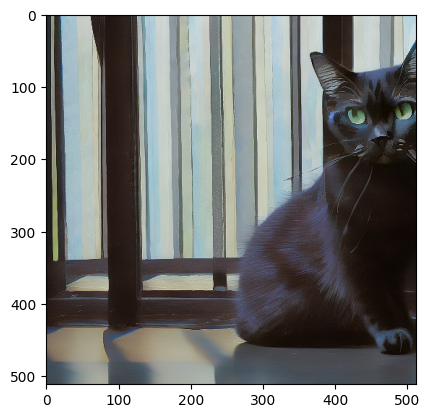

torch.Size([1, 3, 512, 512])


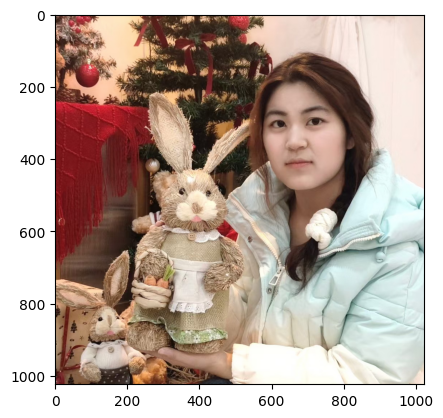

token embedding shape torch.Size([1, 77, 768])
token embedding shape torch.Size([1, 77, 768])
vae encoder input noise.shape torch.Size([1, 4, 64, 64])
in ddpm start step is 3


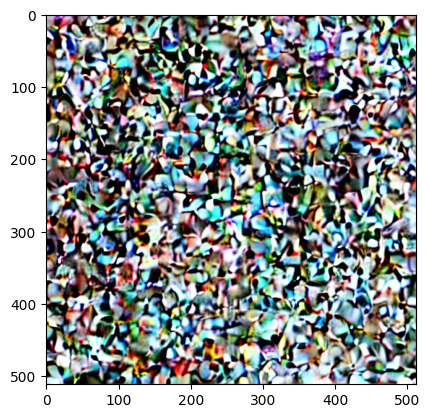

100%|██████████| 17/17 [00:02<00:00,  6.55it/s]


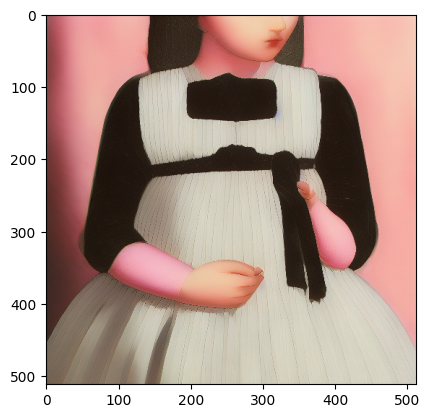

In [60]:
from tqdm import tqdm
import torch
from StableDiffusion.Utils import Utils
import StableDiffusion.DdpmSamplerTorch
import StableDiffusion.Utils
import StableDiffusion.UnetGlobalCrossAttentionBlock
import StableDiffusion.UnetDenoise
import StableDiffusion.GenPipe
import importlib
importlib.reload(StableDiffusion.DdpmSamplerTorch)
importlib.reload(StableDiffusion.TimeEmbedding)
importlib.reload(StableDiffusion.Utils)
importlib.reload(StableDiffusion.UnetGlobalCrossAttentionBlock)
importlib.reload(StableDiffusion.UnetDenoise)
importlib.reload(StableDiffusion.GenPipe)
from StableDiffusion.DdpmSamplerTorch import DdpmSamplerTorch
from StableDiffusion.Utils import Utils
from StableDiffusion.GenPipe import GenPipe

genPipe = GenPipe(vaeEncoder,vaeDecoder,clipEncoder,diffusionProcess)
prompt='a black cat siting by windows'
imgStepList = genPipe.genImage(prompt)
filePath = './images/apple.jpg'
filePath ='./images/pusiyue_front_1024_1024.jpg'
imgBatch = Utils.loadImageBatch(filePath)
prompt = 'a girl holding a black cat'
imgStepList = genPipe.genImage(prompt,refImage=imgBatch,noiseStength=0.8)


torch.Size([1, 3, 512, 512])


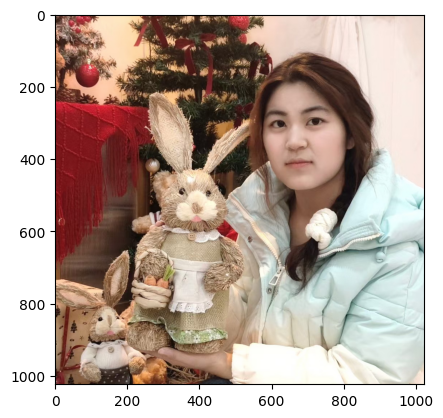

token embedding shape torch.Size([1, 77, 768])
token embedding shape torch.Size([1, 77, 768])
vae encoder input noise.shape torch.Size([1, 4, 64, 64])
in ddpm start step is 14


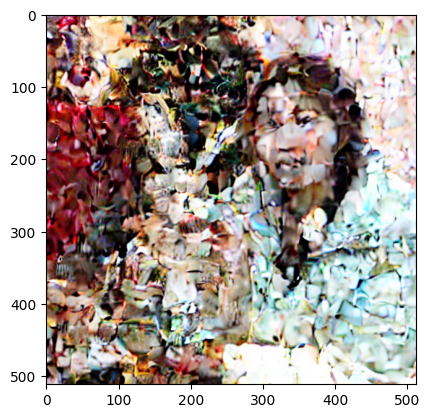

100%|██████████| 6/6 [00:00<00:00,  6.54it/s]


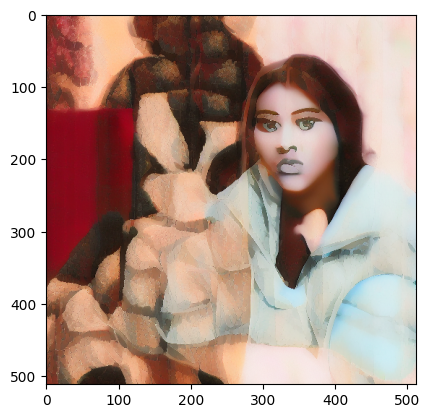

In [55]:
filePath = './images/apple.jpg'
filePath ='./images/pusiyue_front_1024_1024.jpg'
imgBatch = Utils.loadImageBatch(filePath)
imgStepList = genPipe.genImage(prompt,refImage=imgBatch,noiseStength=0.5)

torch.Size([1, 3, 512, 512])


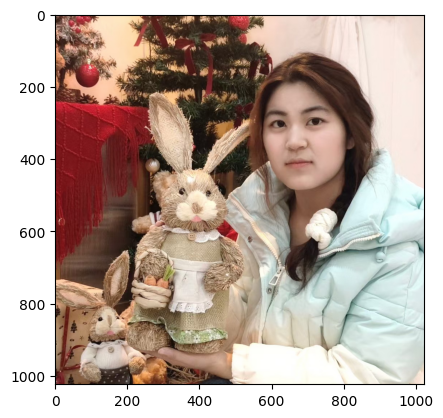

token embedding shape torch.Size([1, 77, 768])
token embedding shape torch.Size([1, 77, 768])
input image is none,use random noise instead
timesteps typetorch.int64


  2%|▏         | 1/50 [00:00<00:06,  7.92it/s]

timesteps  0%|          | 0/50 [00:00<?, ?it/s]


100%|██████████| 50/50 [00:07<00:00,  6.45it/s]


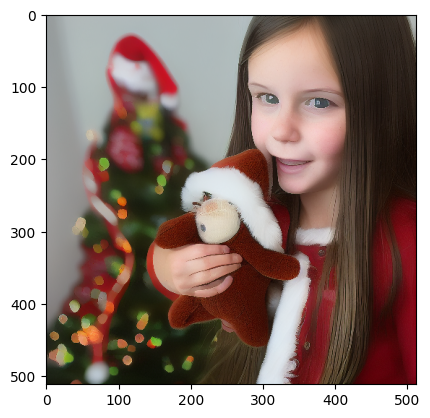

In [15]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
from tqdm import tqdm
import torch
from transformers import CLIPTokenizer
import numpy as np
from StableDiffusion.Utils import Utils
import matplotlib.pyplot as plt
import StableDiffusion.DdpmSamplerTorch
import StableDiffusion.TimeEmbedding
import StableDiffusion.Utils
import StableDiffusion.UnetGlobalCrossAttentionBlock
import StableDiffusion.UnetDenoise
import importlib
importlib.reload(StableDiffusion.DdpmSamplerTorch)
importlib.reload(StableDiffusion.TimeEmbedding)
importlib.reload(StableDiffusion.Utils)
importlib.reload(StableDiffusion.UnetGlobalCrossAttentionBlock)
importlib.reload(StableDiffusion.UnetDenoise)
from StableDiffusion.DdpmSamplerTorch import DdpmSamplerTorch
from StableDiffusion.TimeEmbedding import TimeEmbedding
from StableDiffusion.Utils import Utils
from StableDiffusion.UnetGlobalCrossAttentionBlock import UnetGlobalCrossAttentionBlock
from StableDiffusion.UnetDenoise import UnetDenoise
#img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
#img1 = cv2.imread('./images/apple.jpg')
filePath = './images/apple.jpg'
filePath ='./images/pusiyue_front_1024_1024.jpg'
imgBatch = Utils.loadImageBatch(filePath)
Width = 512
Height = 512
LatentWidth = Width//8
LatentHeight = Height//8
LatentShape = (1,4,LatentHeight,LatentWidth)
#LatentShape = (4,4,LatentHeight,LatentWidth)
imgBatch = imgBatch.to(device)
inputImage = imgBatch
inputImage = None
isDoingCfg = True
#isDoingCfg = True
numInferenceSteps = 50
#cfgScale = 7.5
cfgScale = 7.5
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
# This forces the GPU to use slower, deterministic algorithms
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

randomGenerator = torch.Generator(device=device)
randomGenerator.manual_seed(seed)
sampler = DdpmSamplerTorch(randomGenerator=randomGenerator,
                           numTrainingSteps=1000,
                           numInferenceSteps=numInferenceSteps)
promptPositive = [
        '1girl, solo, long_hair, looking_at_viewer, brown_hair, \
            hair_ornament, holding, jacket, black_eyes, lips,\
        stuffed_toy, scrunchie, stuffed_animal, christmas, \
            realistic, stuffed_bunny, carrot, christmas_tree, christmas_ornaments'  #wd14 tag
            
        #'a girl walking on a Chrismas street in a snowing day', \
         #  'a woman holding two stuffed rabbits in front of a christmas tree',      
        #'a cat sitting by window while snow falls from the sky',
        #'10 cat'
        #'1boy'
        #'a girl playing with a cat in a snowing day'
        #'a cat sitting by window while snow falls from the sky'
        #'a girl holding a bundle of flowers in a vase,highresolutin,masterpiece,best quality,8k'
        ]
#promptNegative = ['blur, ugly, bad, poor']    
promptNegative =['lowres, {bad}, error, fewer, extra,\
                 missing, worst quality, jpeg artifacts, \
                 bad quality, watermark, unfinished, \
                displeasing, chromatic aberration, signature, \
                    extra digits, artistic error, username, \
                        scan, [abstract]']
promptPositiveTokens,attentionMaskPositive = Utils.getPromptTokens(promptPositive,device=device)
promptNegativeTokens,attentionMaskNegative = Utils.getPromptTokens(promptNegative,device=device)
clipInputsPositive =promptPositiveTokens
clipInputsNegative = promptNegativeTokens
vaeEncoder.eval()
vaeDecoder.eval()
diffusionProcess.eval()
clipEncoder.eval()
imgStepList = []
with torch.no_grad():
    clipOutputsPositive = clipEncoder(clipInputsPositive,attentionMask = attentionMaskPositive)
    clipOutputsNegative = clipEncoder(clipInputsNegative,attentionMask = attentionMaskNegative)   
    #clipOutputsPositive = clipEncoder(clipInputsPositive,attentionMask = None)
    #clipOutputsNegative = clipEncoder(clipInputsNegative,attentionMask = None) 
    #print(clipOutputs)
    
    if isDoingCfg == True:
        clipOutputs = torch.cat([clipOutputsPositive,clipOutputsNegative])
    else:
        clipOutputs = clipOutputsPositive
        
    
    if inputImage is not None:
        
        print(f'use input image to guide image generation')
        inputNoise =torch.randn(LatentShape,generator=randomGenerator,device=device)      
        #inputNoise = None
        latentNoised = vaeEncoder(inputImage,inputNoise)
        sampler.setAddNoiseStrength(0.3)
        time = sampler.getInferenceTimeSteps()[0].to(device)
        latentNoised = sampler.addNoise(latentNoised,time)
        imageDecodedDirect = vaeDecoder(latentNoised)       
        Utils.showBatchImage(imageDecodedDirect)
        
    else: 
        print(f'input image is none,use random noise instead')
        latentNoised = torch.randn(LatentShape,generator=randomGenerator,device=device)
    
    timesteps = sampler.getInferenceTimeSteps() 
    print(f'timesteps type{timesteps.dtype}')       
    
    timesteps = tqdm(timesteps)
    print(f'timesteps{timesteps}')
    for i,time in enumerate(timesteps):
        #print(f'i step: {i} time step: {time} {time.device}')              
        timeEmbedding320 = Utils.getTimeEmbedding(time)    
        timeEmbedding320= sampler.numpy2Tensor(timeEmbedding320,device=device)
        modelNoisedLatentInput = latentNoised
        contextInput = clipOutputs
        if isDoingCfg == True:
            #print(f'is doing cfg scale {cfgScale}')
            modelNoisedLatentInput = modelNoisedLatentInput.repeat(2,1,1,1)
            #print(f'doing cfg scale latent inputs shape  {modelNoisedLatentInput.shape}') 
        
        #print(f'latentinput device: {modelNoisedLatentInput.device}  contextinput device: {contextInput.device} timeembed device: {timeEmbedding320.device}')
        #print(f'latent input: {modelNoisedLatentInput} contextinput: {contextInput} timeinput: {timeEmbedding320}')
        #print(f'latent input: {modelNoisedLatentInput.shape} contextinput: {contextInput.shape} timeinput: {timeEmbedding320.shape}')
        modelEstimatedNoiseInLatent  = diffusionProcess(modelNoisedLatentInput,contextInput,timeEmbedding320)
        
        if isDoingCfg == True:
            #print(f'is doing cfg scale {cfgScale}')
            positiveEstimate,negativeEstimate = modelEstimatedNoiseInLatent.chunk(2,dim=0)
            #print(modelEstimatedNoiseInLatent.shape,positiveEstimate.shape,negativeEstimate.shape)
            modelEstimatedNoiseInLatent = cfgScale * positiveEstimate  + (1-cfgScale) * negativeEstimate
            #print(f'after cfg scale {positiveEstimate.shape} {negativeEstimate.shape} {modelEstimatedNoiseInLatent.shape}')
            modelNoisedLatentInput = latentNoised
            #added 20260223 to make sure the input back to batch size 1
        

        #print(f'latent  noise  time input beforme remove noise  {modelNoisedLatentInputNumpy.shape} context input {contextInputNumpy.shape} time embedding {timeEmbedding320Numpy.shape}')
        cleanerLatent = sampler.removeNoiseFromLatent(modelNoisedLatentInput,modelEstimatedNoiseInLatent,time)        
        latentNoised  = cleanerLatent
        #print(f'latent input at the end while step {i} {latentNoised.shape}')
        
        #print(f'latent noised {latentNoised.shape} {latentNoised}')
        imageDecoded = vaeDecoder(latentNoised)
        imgStepList.append(imageDecoded)
        #if i % 10 == 0:
            #imageDecoded = vaeDecoder(latentNoised)         
            #Utils.showBatchImage(imageDecoded)
        

Utils.showBatchImage(imgStepList[-1]) 
#imageDecoded = vaeDecoder(latentNoised)         
#Utils.showBatchImage(imageDecoded)    


    
    

In [13]:
injectLora(clipEncoderLora,('in_proj','out_proj'))
clipLoraDict = dict(clipEncoderLora.named_parameters())
clipDict = dict(clipEncoder.named_parameters())

clipLoraDict['layers.0.attention.in_proj.originLinear.weight']

 embedding.position_embedding torch.Size([77, 768])
 embedding.token_embedding.weight torch.Size([49408, 768])
 layers.0.layernorm_1.weight torch.Size([768])
 layers.0.layernorm_1.bias torch.Size([768])
 layers.0.attention.in_proj.loraA torch.Size([768, 8])
 layers.0.attention.in_proj.loraB torch.Size([8, 2304])
 layers.0.attention.in_proj.originLinear.weight torch.Size([2304, 768])
 layers.0.attention.in_proj.originLinear.bias torch.Size([2304])
 layers.0.attention.out_proj.loraA torch.Size([768, 8])
 layers.0.attention.out_proj.loraB torch.Size([8, 768])
 layers.0.attention.out_proj.originLinear.weight torch.Size([768, 768])
 layers.0.attention.out_proj.originLinear.bias torch.Size([768])
 layers.0.layernorm_2.weight torch.Size([768])
 layers.0.layernorm_2.bias torch.Size([768])
 layers.0.linear_1.weight torch.Size([3072, 768])
 layers.0.linear_1.bias torch.Size([3072])
 layers.0.linear_2.weight torch.Size([768, 3072])
 layers.0.linear_2.bias torch.Size([768])
 layers.1.layernorm_1.w

Parameter containing:
tensor([[ 0.0139,  0.0147, -0.0089,  ..., -0.0349, -0.0042, -0.0188],
        [-0.0586, -0.0059, -0.0179,  ...,  0.0012, -0.0068,  0.0254],
        [-0.0211, -0.0321,  0.0308,  ..., -0.0189,  0.0091,  0.0066],
        ...,
        [-0.0217, -0.0089, -0.0143,  ..., -0.0153,  0.0053,  0.0016],
        [-0.0086, -0.0083, -0.0049,  ...,  0.0208, -0.0048, -0.0041],
        [-0.0087, -0.0024,  0.0105,  ..., -0.0037, -0.0148,  0.0030]],
       device='cuda:0', requires_grad=True)

In [14]:
clipDict['layers.0.attention.in_proj.weight']

Parameter containing:
tensor([[ 0.0139,  0.0147, -0.0089,  ..., -0.0349, -0.0042, -0.0188],
        [-0.0586, -0.0059, -0.0179,  ...,  0.0012, -0.0068,  0.0254],
        [-0.0211, -0.0321,  0.0308,  ..., -0.0189,  0.0091,  0.0066],
        ...,
        [-0.0217, -0.0089, -0.0143,  ..., -0.0153,  0.0053,  0.0016],
        [-0.0086, -0.0083, -0.0049,  ...,  0.0208, -0.0048, -0.0041],
        [-0.0087, -0.0024,  0.0105,  ..., -0.0037, -0.0148,  0.0030]],
       device='cuda:0', requires_grad=True)

In [2]:
import StableDiffusion.LoraLayer
import importlib
importlib.reload(StableDiffusion.LoraLayer)
from StableDiffusion.LoraLayer import LoraLayer



clipLayersDict = dict(clipEncoder.named_modules())
rawLinear = clipLayersDict['layers.11.attention.out_proj']



In [36]:
lora1 = LoraLayer(rawLinear,rank = 8,alpha =16)
for name, param in lora1.named_parameters():
    print("-" * 30)
    print(f"Parameter Name: {name}")
    print(f"Shape: {param.shape}")
    print(f"Requires Grad: {param.requires_grad}")
    # print(param.data) # Uncomment this if you want to see the actual numbers

lora1.to(device)


------------------------------
Parameter Name: loraA
Shape: torch.Size([768, 8])
Requires Grad: True
------------------------------
Parameter Name: loraB
Shape: torch.Size([8, 768])
Requires Grad: True
------------------------------
Parameter Name: originLinear.weight
Shape: torch.Size([768, 768])
Requires Grad: False
------------------------------
Parameter Name: originLinear.bias
Shape: torch.Size([768])
Requires Grad: False


LoraLayer(
  (originLinear): Linear(in_features=768, out_features=768, bias=True)
)

In [17]:
print(lora1.alpha)
print(lora1.rank)
print(lora1.scale)
print(f'lora1.loraA  {lora1.loraA} {lora1.loraA.shape}')
print(f'lora1.loraB  {lora1.loraB}  {lora1.loraB.shape}')
      

16
8
2.0
lora1.loraA  Parameter containing:
tensor([[ 0.0962,  0.0491, -0.1887,  ..., -0.3529, -0.0487,  0.2995],
        [ 0.0673,  0.0200,  0.0351,  ...,  0.5498,  0.2075, -0.2122],
        [ 0.4916, -0.4762,  0.4006,  ..., -0.2131, -0.0747,  0.2232],
        ...,
        [-0.1283,  0.1568, -0.2501,  ...,  0.0059,  0.2656, -0.1761],
        [-0.0360,  0.3712, -0.1295,  ..., -0.2958, -0.2810,  0.1501],
        [ 0.2324, -0.2738,  0.1563,  ...,  0.4901, -0.2719, -0.2658]],
       device='cuda:0', requires_grad=True) torch.Size([768, 8])
lora1.loraB  Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', requires_grad=True)  torch.Size([8, 768])


In [46]:
for name, module in clipEncoder.named_modules():
    # 'name' is the string path (e.g., 'layers.0.self_attn.q_proj')
    # 'module' is the actual layer object
    print(f"Name: {name} | Type: {type(module)}")

Name:  | Type: <class 'StableDiffusion.ClipEncoder.ClipEncoder'>
Name: embedding | Type: <class 'StableDiffusion.ClipEncoder.ClipEmbedding'>
Name: embedding.token_embedding | Type: <class 'torch.nn.modules.sparse.Embedding'>
Name: layers | Type: <class 'torch.nn.modules.container.ModuleList'>
Name: layers.0 | Type: <class 'StableDiffusion.ClipEncoder.ClipEncoderLayer'>
Name: layers.0.layernorm_1 | Type: <class 'torch.nn.modules.normalization.LayerNorm'>
Name: layers.0.attention | Type: <class 'StableDiffusion.Attention.MHSelfAttention'>
Name: layers.0.attention.in_proj | Type: <class 'StableDiffusion.LoraLayer.LoraLayer'>
Name: layers.0.attention.in_proj.originLinear | Type: <class 'torch.nn.modules.linear.Linear'>
Name: layers.0.attention.out_proj | Type: <class 'StableDiffusion.LoraLayer.LoraLayer'>
Name: layers.0.attention.out_proj.originLinear | Type: <class 'torch.nn.modules.linear.Linear'>
Name: layers.0.layernorm_2 | Type: <class 'torch.nn.modules.normalization.LayerNorm'>
Name:

In [49]:
import torch
import torch.nn as nn
model = clipEncoder
for name,layer in model.named_modules():
    nameSplits=name.split('.')
    filterName = ('in_proj','out_proj')
    if name.endswith(filterName) and isinstance(layer,nn.Linear):
        print(name)
        partNames = name.split('.')
        preName = '.'.join(partNames[:-1])
        layerName = partNames[-1]
        print(f'preName = {preName}')
        if preName =='':
            parent = model
        else:
            parent = model.get_submodule(preName)
            print(f'parent = {parent} {type(parent)}')
    
        injectedLoraLayer = LoraLayer(layer,rank =8,alpha=16)
        setattr(parent,layerName,injectedLoraLayer)
            


In [50]:
def count_trainable_parameters(model):
    # Total trainable params
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    # Non-trainable (frozen) params
    frozen_params = sum(p.numel() for p in model.parameters() if not p.requires_grad)
    
    print(f"Trainable (LoRA): {trainable_params:,}")
    print(f"Frozen (Original): {frozen_params:,}")
    print(f"Percentage: {100 * trainable_params / (trainable_params + frozen_params):.4f}%")

count_trainable_parameters(clipEncoder)

Trainable (LoRA): 442,368
Frozen (Original): 123,060,480
Percentage: 0.3582%


In [51]:
for name,params in model.named_parameters():
    print(f' {name} {params.size()}')

 embedding.position_embedding torch.Size([77, 768])
 embedding.token_embedding.weight torch.Size([49408, 768])
 layers.0.layernorm_1.weight torch.Size([768])
 layers.0.layernorm_1.bias torch.Size([768])
 layers.0.attention.in_proj.loraA torch.Size([768, 8])
 layers.0.attention.in_proj.loraB torch.Size([8, 2304])
 layers.0.attention.in_proj.originLinear.weight torch.Size([2304, 768])
 layers.0.attention.in_proj.originLinear.bias torch.Size([2304])
 layers.0.attention.out_proj.loraA torch.Size([768, 8])
 layers.0.attention.out_proj.loraB torch.Size([8, 768])
 layers.0.attention.out_proj.originLinear.weight torch.Size([768, 768])
 layers.0.attention.out_proj.originLinear.bias torch.Size([768])
 layers.0.layernorm_2.weight torch.Size([768])
 layers.0.layernorm_2.bias torch.Size([768])
 layers.0.linear_1.weight torch.Size([3072, 768])
 layers.0.linear_1.bias torch.Size([3072])
 layers.0.linear_2.weight torch.Size([768, 3072])
 layers.0.linear_2.bias torch.Size([768])
 layers.1.layernorm_1.w

In [45]:
for name,layer in model.named_modules():
    print(f' {name} {layer}')




  ClipEncoder(
  (embedding): ClipEmbedding(
    (token_embedding): Embedding(49408, 768)
  )
  (layers): ModuleList(
    (0-11): 12 x ClipEncoderLayer(
      (layernorm_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attention): MHSelfAttention(
        (in_proj): LoraLayer(
          (originLinear): Linear(in_features=768, out_features=2304, bias=True)
        )
        (out_proj): LoraLayer(
          (originLinear): Linear(in_features=768, out_features=768, bias=True)
        )
      )
      (layernorm_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (linear_1): Linear(in_features=768, out_features=3072, bias=True)
      (linear_2): Linear(in_features=3072, out_features=768, bias=True)
    )
  )
  (layernorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)
 embedding ClipEmbedding(
  (token_embedding): Embedding(49408, 768)
)
 embedding.token_embedding Embedding(49408, 768)
 layers ModuleList(
  (0-11): 12 x ClipEncoderLayer(
    (layernorm_

In [ ]:
'''   
    filterName = 'k_proj'
    if name.endswith(filterName):
        print(name)
        
    filterName = 'v_proj'
    if name.endswith(filterName):
        print(name)
    
    filterName = 'q_proj'
    if name.endswith(filterName):
        print(name)
    
'''    

    #print(name_cols)

In [19]:
name = clipEncoder
name_cols=name.split('.')

# 逐层下探到linear归属的module
children=name_cols[:-1]
cur_layer=model 
for child in children:
    cur_layer=getattr(cur_layer,child)

#print(layer==getattr(cur_layer,name_cols[-1]))
#lora_layer=LoraLayer(layer,layer.in_features,layer.out_features,LORA_R,LORA_ALPHA)
#setattr(cur_layer,name_cols[-1],lora_layer)

AttributeError: 'ClipEncoder' object has no attribute 'split'